# Tutorial 3 - Basic plotting

In [Tutorial 2](./Tutorial%202%20-%20Compare%20models.ipynb), we made use of PyBaMM's automatic plotting function when comparing models. This gave a good quick overview of many of the key variables in the model. However, by passing in just a few arguments it is easy to plot any of the many other variables that may be of interest to you. We start by building and solving a model as before:

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import matplotlib.pyplot as plt

model_dfn = pybamm.lithium_ion.DFN()
sim_dfn = pybamm.Simulation(model_dfn)
sim_dfn.solve([0, 3600])

ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\saransh\saransh_softwares\python_3.9\python.exe -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


We now want to plot a selection of the model variables. To see a full list of the available variables just type:

In [2]:
model_dfn.variable_names()

 'Cell temperature',
 'Cell temperature [K]',
 'X-averaged cell temperature',
 'X-averaged cell temperature [K]',
 'Volume-averaged cell temperature',
 'Volume-averaged cell temperature [K]',
 'Ambient temperature [K]',
 'Ambient temperature',
 'Inner negative electrode SEI thickness',
 'Inner negative electrode SEI thickness [m]',
 'X-averaged inner negative electrode SEI thickness',
 'X-averaged inner negative electrode SEI thickness [m]',
 'Outer negative electrode SEI thickness',
 'Outer negative electrode SEI thickness [m]',
 'X-averaged outer negative electrode SEI thickness',
 'X-averaged outer negative electrode SEI thickness [m]',
 'Negative electrode SEI thickness',
 'Negative electrode SEI thickness [m]',
 'X-averaged negative electrode SEI thickness',
 'X-averaged negative electrode SEI thickness [m]',
 'Total negative electrode SEI thickness',
 'Total negative electrode SEI thickness [m]',
 'X-averaged total negative electrode SEI thickness',
 'X-averaged total negative el

There are a _lot_ of variables. You can also search the list of variables for a particular string (e.g. "electrolyte")

In [3]:
model_dfn.variables.search("electrolyte")

Electrolyte concentration
Electrolyte concentration [Molar]
Electrolyte concentration [mol.m-3]
Electrolyte current density
Electrolyte current density [A.m-2]
Electrolyte flux
Electrolyte flux [mol.m-2.s-1]
Electrolyte potential
Electrolyte potential [V]
Electrolyte tortuosity
Gradient of electrolyte potential
Gradient of negative electrolyte potential
Gradient of positive electrolyte potential
Gradient of separator electrolyte potential
Loss of lithium inventory, including electrolyte [%]
Negative electrolyte concentration
Negative electrolyte concentration [Molar]
Negative electrolyte concentration [mol.m-3]
Negative electrolyte potential
Negative electrolyte potential [V]
Negative electrolyte tortuosity
Positive electrolyte concentration
Positive electrolyte concentration [Molar]
Positive electrolyte concentration [mol.m-3]
Positive electrolyte potential
Positive electrolyte potential [V]
Positive electrolyte tortuosity
Separator electrolyte concentration
Separator electrolyte conc

We have tried to make variables names fairly self explanatory. However, there are two variables for most quantities. This is because PyBaMM utilises both dimensionless and dimensional variables for these quantities. As a rule, the dimensionless variables have no units in their name and the dimensional variables have units in their name. If in doubt, we recommend using the dimensional variable with units.

As a first example, we choose to plot the terminal voltage. We add this to a list and then pass this list to the `plot` method of our simulation:

In [4]:
output_variables = ["Terminal voltage [V]"]
sim_dfn.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

Alternatively, we may be interested in plotting both the electrolyte concentration and the terminal voltage. In which case, we would do:

In [5]:
output_variables = ["Electrolyte concentration [mol.m-3]", "Terminal voltage [V]"]
sim_dfn.plot(output_variables=output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

You can also plot multiple variables on the same plot by nesting lists

In [6]:
sim_dfn.plot([["Electrode current density", "Electrolyte current density"], "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [7]:
sim_dfn.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

For plotting the voltage components you can use the `plot_votage_components` function

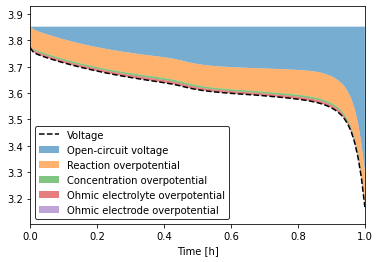

<AxesSubplot:xlabel='Time [h]'>

In [8]:
pybamm.plot_voltage_components(sim_dfn.solution)

And with a few modifications (by creating subplots and by providing the axes on which the voltage components have to be plotted), it can also be used to compare the voltage components of different simulations

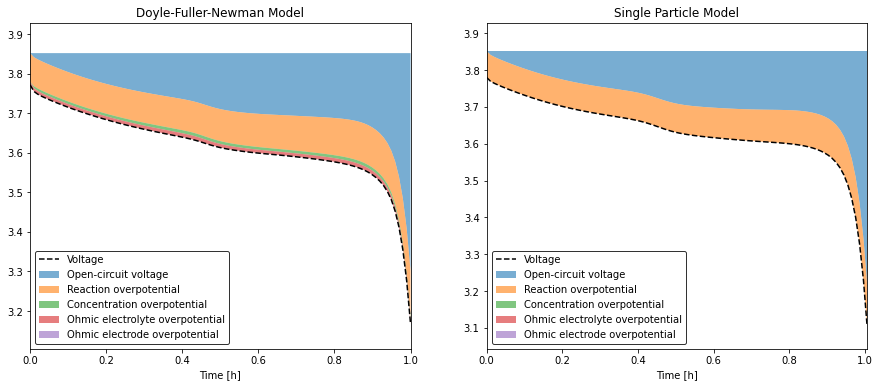

In [9]:
# simulating and solving Single Particle Model
model_spm = pybamm.lithium_ion.SPM()
sim_spm = pybamm.Simulation(model_spm)
sim_spm.solve([0, 3700])

# comparing voltage components for Doyle-Fuller-Newman model and Single Particle Model
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

pybamm.plot_voltage_components(sim_dfn.solution, ax=axes.flat[0])
pybamm.plot_voltage_components(sim_spm.solution, ax=axes.flat[1])

axes.flat[0].set_title("Doyle-Fuller-Newman Model")
axes.flat[1].set_title("Single Particle Model")

plt.show()

In this tutorial we have seen how to use the plotting functionality in PyBaMM.

In [Tutorial 4](./Tutorial%204%20-%20Setting%20parameter%20values.ipynb) we show how to change parameter values.

## References

The relevant papers for this notebook are:

In [10]:
pybamm.print_citations()

[1] Joel A. E. Andersson, Joris Gillis, Greg Horn, James B. Rawlings, and Moritz Diehl. CasADi – A software framework for nonlinear optimization and optimal control. Mathematical Programming Computation, 11(1):1–36, 2019. doi:10.1007/s12532-018-0139-4.
[2] Marc Doyle, Thomas F. Fuller, and John Newman. Modeling of galvanostatic charge and discharge of the lithium/polymer/insertion cell. Journal of the Electrochemical society, 140(6):1526–1533, 1993. doi:10.1149/1.2221597.
[3] Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, and others. Array programming with NumPy. Nature, 585(7825):357–362, 2020. doi:10.1038/s41586-020-2649-2.
[4] Scott G. Marquis, Valentin Sulzer, Robert Timms, Colin P. Please, and S. Jon Chapman. An asymptotic derivation of a single particle model with electrolyte. Journal of The Electrochemical Society, 166(15):A3693–A3706, 2019. doi:10.1149/